In [2]:
# Package import
import torch
import torchvision
import os
import numpy as np
import nibabel as nib
from matplotlib import pyplot as plt
import github_noise_add.dipy.dipy.sims.phantom as phantom

In [3]:
# Setting up data
class BrainMRDataset(torch.utils.data.Dataset):
    def __init__(self, root):
        self.root = root
        self.files = os.listdir(self.root)
    
    def __getitem__(self, idx):
        img_name = self.files[idx]
        img = nib.load(os.path.join(self.root,img_name))
        img_orig = np.array(img.dataobj)
        img_noisy = phantom.add_noise(img_orig, snr=10, noise_type = 'rician')
        return (img_name, img_orig, img_noisy, img_orig.shape)

    def __len__(self):
        return len(self.files)

In [4]:
# Load data and show dataset length
path_orig = 'Data_train_orig/'
full_data = BrainMRDataset(path_orig)
print("Dataset length: %d" % (len(full_data)))

Dataset length: 582


An Example
 name: IXI483-HH-2177-T1.nii
original image:


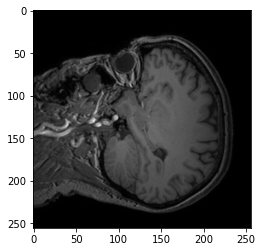

noisy image:


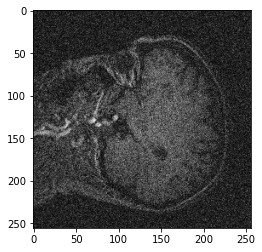

In [5]:
# An example of one pair of image (original vs noisy)
print('An Example')
index = 345
print(' name: ' + full_data[index][0])
print('original image:')
plt.imshow(full_data[index][1][:,:,50:51],cmap = 'gray')
plt.show()
print('noisy image:')
plt.imshow(full_data[index][2][:,:,50:51],cmap = 'gray')
plt.show()

In [11]:
full_data[index][1].shape[2]/2

75.0

In [10]:
# Divide dataset randomly 70-30 into training/test data
train_size = int(0.7 * len(full_data))
test_size = len(full_data) - train_size
train_data, test_data = torch.utils.data.random_split(full_data, [train_size, test_size])

In [12]:
print("Full Dataset length: %d" % (len(full_data)))
print("Training Dataset length: %d" % (len(train_data)))
print("Test Dataset length: %d" % (len(test_data)))

Full Dataset length: 582
Training Dataset length: 407
Test Dataset length: 175


An Example
 name: IXI505-Guys-1026-T1.nii
original image:


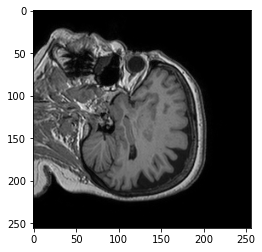

noisy image:


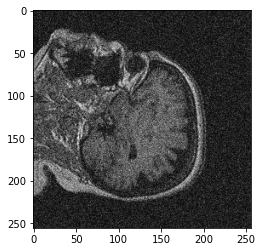

In [15]:
# An example
print('An Example')
index = 406
print(' name: ' + train_data[index][0])
print('original image:')
plt.imshow(train_data[index][1][:,:,50:51],cmap = 'gray')
plt.show()
print('noisy image:')
plt.imshow(train_data[index][2][:,:,50:51],cmap = 'gray')
plt.show()

In [1]:
# Apply supervised learning DnCNN in Training set
'''
# --------------------------------------------
# training code for DnCNN
# --------------------------------------------
# Kai Zhang (cskaizhang@gmail.com)
# github: https://github.com/cszn/KAIR
#         https://github.com/cszn/DnCNN
#
# Reference:
@article{zhang2017beyond,
  title={Beyond a gaussian denoiser: Residual learning of deep cnn for image denoising},
  author={Zhang, Kai and Zuo, Wangmeng and Chen, Yunjin and Meng, Deyu and Zhang, Lei},
  journal={IEEE Transactions on Image Processing},
  volume={26},
  number={7},
  pages={3142--3155},
  year={2017},
  publisher={IEEE}
}
# --------------------------------------------
# https://github.com/xinntao/BasicSR
# --------------------------------------------
'''
from github_DnCNN.KAIR import main_train_dncnn as train_dncnn

ModuleNotFoundError: No module named 'utils_m'

In [9]:
# Evaluate the model in Test set